
# IMPORTING LIBRARIES

In [2]:
!pip install tensorflow

In [4]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## LOADING DATASET

In [5]:
(X_train, y_train), (X_test, y_test) =  tf.keras.datasets.mnist.load_data(path="mnist_train.csv")

11490434/11490434 [==============================] - 3s 0us/step


#### Checking Size:-

In [6]:
print(f"X_train_shape : {X_train.shape} \ny_train.shape {y_train.shape}")

X_train_shape : (60000, 28, 28) 
y_train.shape (60000,)


### Plotting image from Data set

label for oth item is  4


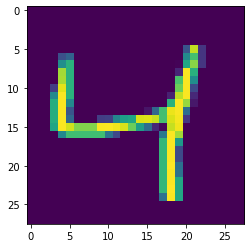

In [7]:
plt.imshow(X_train[2])
print("label for oth item is ",y_train[2])

label for oth item is  1


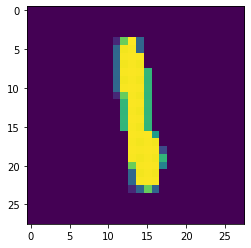

In [8]:
plt.imshow(X_train[200])
print("label for oth item is ",y_train[200])

# Preprocessing the data for CNN model :

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(f"train-shape = {X_train.shape}\ntest-shape = {X_test.shape}")

train-shape = (60000, 28, 28, 1)
test-shape = (10000, 28, 28, 1)


In [10]:
# convert int to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the input to 0-1 
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_train.shape

(60000, 10)

# Create a CNN model architecture : (using grid search)

### Creating Sequential CNN Model

In [12]:
model = Sequential([
    Conv2D(32, (5,5), input_shape=(28,28,1), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size=(2,2),padding="SAME"),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    (BatchNormalization()),
    Dense(10,activation='softmax')
])

### Compile and fit the data to the model :

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                          

### Fit the data after compiling.

In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=200,validation_data=(X_test, y_test)).history

Epoch 1/10
300/300 [==============================] - 55s 168ms/step - loss: 0.1362 - accuracy: 0.9600 - val_loss: 0.1993 - val_accuracy: 0.9810
Epoch 2/10
300/300 [==============================] - 54s 179ms/step - loss: 0.0453 - accuracy: 0.9864 - val_loss: 0.0537 - val_accuracy: 0.9837
Epoch 3/10
300/300 [==============================] - 49s 163ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0450 - val_accuracy: 0.9857
Epoch 4/10
300/300 [==============================] - 60s 200ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0362 - val_accuracy: 0.9880
Epoch 5/10
300/300 [==============================] - 38s 125ms/step - loss: 0.0150 - accuracy: 0.9958 - val_loss: 0.0383 - val_accuracy: 0.9884
Epoch 6/10
300/300 [==============================] - 29s 97ms/step - loss: 0.0115 - accuracy: 0.9968 - val_loss: 0.0349 - val_accuracy: 0.9898
Epoch 7/10
300/300 [==============================] - 31s 103ms/step - loss: 0.0096 - accuracy: 0.9972 - val_loss: 0.0398 - val_acc

### Evaluation:-

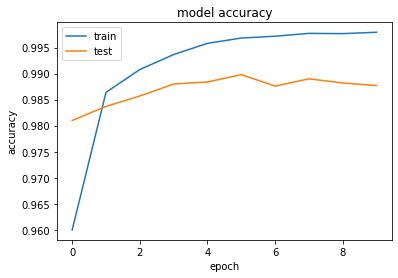

In [15]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [16]:
model.save('project_new.h5')

In [17]:
img = X_train[0]
img = img.reshape(1,28,28,1)

predict_value = model.predict(img)
np.argmax(predict_value)

1/1 [==============================] - 7s 7s/step


5

## So as our model accuracy is pretty good we can move forward and save this model and use it for our app.